### We're calculating the frequency of each word in the transcript to understand which words are mentioned most often.

In [11]:
# Install the youtube_transcript_api library to fetch transcripts from YouTube videos
!pip install youtube_transcript_api
!pip install wordcloud

# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os
import pandas as pd
import requests
import json
from youtube_transcript_api import YouTubeTranscriptApi
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy
import plotly.express as px
import nbformat
import praw

# Load the English language model for spacy
nlp = spacy.load('en_core_web_sm')

# Download necessary datasets for nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Here, we're loading the API key that will be used to fetch YouTube video details.
### Load the API Key

In [2]:
# Load the Google API key from a text file
with open('g_api_key.txt') as file:
    api_key = file.read().strip()

print("API key loaded!")

API key loaded!


## Here, we're loading the API key that will be used to fetch YouTube video details.
### Define the 'get_captions' function and fetch caption details:

In [3]:
def get_captions(video_id, api_key):
    url = f"https://www.googleapis.com/youtube/v3/captions?part=snippet&videoId={video_id}&key={api_key}"
    response = requests.get(url)
    data = response.json()
    
    # Check if the response contains an error
    if 'error' in data:
        print(f"Error: {data['error']['message']}")
        return
    
    # Check if 'items' key exists in the response
    if 'items' not in data:
        print("No captions found for this video.")
        return

    for item in data['items']:
        if item['snippet']['trackKind'] == 'ASR':
            print(f"Automatic captions available in {item['snippet']['language']} language.")
        else:
            print(f"Manual captions available in {item['snippet']['language']} language.")

get_captions("T3FC7qIAGZk", api_key)

Manual captions available in en language.


## This function retrieves the transcript of a specified YouTube video.
### Define the 'get_transcript' function and fetch the transcript:

In [4]:
def get_transcript(video_url):
    video_id = video_url.split("v=")[1]
    transcript_list = YouTubeTranscriptApi.get_transcript(video_id)
    
    transcript = ""
    for entry in transcript_list:
        transcript += " " + entry['text']
    
    return transcript

transcript = get_transcript("https://www.youtube.com/watch?v=T3FC7qIAGZk")

## We're processing the transcript by removing common words (stopwords) and converting everything to lowercase. This helps in better analysis.
### Preprocess the fetched transcript:

In [5]:
def preprocess_transcript(transcript):
    # Convert the transcript to lowercase
    transcript = transcript.lower()

    # Tokenize the transcript into individual words
    words = word_tokenize(transcript)

    # Remove stopwords from the tokenized words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return words

words = preprocess_transcript(transcript)

## Let's take a peek at the first 50 words from the preprocessed transcript.

In [6]:
print(words[:50])  # Print the first 50 words of the transcript

['massage', 'anything', 'mossad', 'qualms', 'takes', 'ensure', 'survival', 'every', 'israeli', 'citizen', 'around', 'world', 'countries', 'stop', 'point', 'mossad', "n't", 'following', 'conversation', 'andrew', 'bustamante', 'former', 'cia', 'covert', 'intelligence', 'officer', 'u.s', 'air', 'force', 'combat', 'veteran', 'including', 'job', 'operational', 'targeting', 'encrypted', 'communications', 'launch', 'operations', '200', 'nuclear', 'intercontinental', 'ballistic', 'missiles', 'andrews', 'seven', 'years', 'cia', 'spy', 'given']


## We're calculating the frequency of each word in the transcript to understand which words are mentioned most often.

In [7]:
freq_dist = FreqDist(words)

## This function analyzes the sentiment or tone of the transcript. It can tell if parts of the transcript are positive, negative, or neutral.

In [8]:
def get_sentiments(transcript):
    # Tokenize the transcript into sentences
    sentences = nltk.sent_tokenize(transcript)
    
    # Analyze sentiments of each sentence and store in a list
    analyzer = SentimentIntensityAnalyzer()

    sentiments = []
    for sentence in sentences:
        sentiment = analyzer.polarity_scores(sentence)
        sentiments.append(sentiment)

    return sentiments

# Analyze sentiments of the fetched transcript
sentiments = get_sentiments(transcript)

## Here, we're identifying named entities (like people, places, and organizations) from the transcript.

In [9]:
def get_entities(transcript):
    
    doc = nlp(transcript)
    
    # Process the transcript using SpaCy to identify named entities
    entities = []
    for entity in doc.ents:
        
        # Extract entities and their types and store in a list
        entities.append((entity.text, entity.label_))

    return entities

# Extract named entities from the fetched transcript
entities = get_entities(transcript)

## We're visualizing the word frequencies with a bar chart to see which words stand out.

In [10]:
# Convert the frequency distribution of words to a pandas DataFrame
df = pd.DataFrame(list(freq_dist.items()), columns=["Word", "Frequency"])

# Create a bar plot of word frequencies using plotly
fig = px.bar(df, x="Word", y="Frequency")
fig.show()

In [12]:
# Load the English language model for spacy
nlp = spacy.load('en_core_web_sm')

# Fetch the transcript again
def get_transcript(video_url):
    video_id = video_url.split("v=")[1]
    transcript_list = YouTubeTranscriptApi.get_transcript(video_id)
    
    transcript = ""
    for entry in transcript_list:
        transcript += " " + entry['text']
    
    return transcript

transcript = get_transcript("https://www.youtube.com/watch?v=T3FC7qIAGZk")

# Extracting nouns from the transcript to represent "topics"
doc = nlp(transcript)
nouns = [token.text for token in doc if token.pos_ == "NOUN"]

# Calculate frequency distribution of the nouns
noun_freq = FreqDist(nouns)

# Select the top 10 nouns for visualization
top_nouns = noun_freq.most_common(10)

# Create a pie chart for Topic Distribution
df_nouns = pd.DataFrame(top_nouns, columns=["Noun", "Frequency"])
fig_nouns = px.pie(df_nouns, names='Noun', values='Frequency', title='Topic Distribution in Transcript')
fig_nouns.show()

In [13]:
# Tokenize the transcript into sentences
sentences = nltk.sent_tokenize(transcript)

# Analyze sentiments of each sentence
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = [analyzer.polarity_scores(sentence)['compound'] for sentence in sentences]

# Create a line chart for Sentiment Analysis Over Time
df_sentiments = pd.DataFrame({
    'Sentence Number': range(1, len(sentences) + 1),
    'Sentiment Score': sentiment_scores
})

fig_sentiments = px.line(df_sentiments, x='Sentence Number', y='Sentiment Score', title='Sentiment Analysis Over Time')
fig_sentiments.show()

In [14]:
# Load the English language model for spacy
nlp = spacy.load('en_core_web_sm')

# Fetch the transcript again
def get_transcript(video_url):
    video_id = video_url.split("v=")[1]
    transcript_list = YouTubeTranscriptApi.get_transcript(video_id)
    
    transcript = ""
    for entry in transcript_list:
        transcript += " " + entry['text']
    
    return transcript

transcript = get_transcript("https://www.youtube.com/watch?v=T3FC7qIAGZk")

# Tokenize the transcript into sentences
sentences = nltk.sent_tokenize(transcript)

# Re-analyze sentiments of each sentence
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = [analyzer.polarity_scores(sentence)['compound'] for sentence in sentences]

# Create a line chart for Sentiment Analysis Over Time
df_sentiments = pd.DataFrame({
    'Sentence Number': range(1, len(sentences) + 1),
    'Sentiment Score': sentiment_scores
})

fig_sentiments = px.line(df_sentiments, x='Sentence Number', y='Sentiment Score', title='Sentiment Analysis Over Time')
fig_sentiments.show()

In [15]:
# Extract named entities from the transcript
doc = nlp(transcript)
entities = [entity.text for entity in doc.ents]

# Calculate frequency distribution of the entities
entity_freq = FreqDist(entities)

# Select the top 10 entities for visualization
top_entities = entity_freq.most_common(10)

# Create a bar chart for Named Entity Recognition
df_entities = pd.DataFrame(top_entities, columns=["Entity", "Frequency"])
fig_entities = px.bar(df_entities, x='Entity', y='Frequency', title='Top Named Entities in Transcript')
fig_entities.show()

In [20]:
# Define the outline timestamps
timestamps = {
    "Introduction": "0:00",
    "CIA and the President": "0:56",
    "War in Ukraine": "12:34",
    "Most powerful intelligence agencies": "53:30",
    "David Petraeus": "1:00:40",
    "Undercover disguises": "1:10:17",
    "Human nature": "1:23:16",
    "CIA recruitment process": "1:32:36",
    "CIA and secrecy": "1:49:19",
    "Cyber security": "1:55:52",
    "Sexpionage": "2:06:34",
    "Private intelligence": "2:13:08",
    "NSA and Snowden": "2:26:35",
    "Conspiracy theories": "2:54:34",
    "CIA and UFOs": "3:15:42",
    "Spy tricks": "3:30:27",
    "Advice for young people": "3:47:10"
}

# Convert timestamps to minutes
def convert_to_minutes(time_str):
    parts = list(map(int, time_str.split(':')))
    if len(parts) == 3:
        hours, minutes, seconds = parts
    else:
        minutes, seconds = parts
        hours = 0
    return hours * 60 + minutes + seconds / 60

minutes = {key: convert_to_minutes(value) for key, value in timestamps.items()}

# Calculate topic durations
durations = {}
topics = list(minutes.keys())
for i in range(len(topics) - 1):
    durations[topics[i]] = minutes[topics[i + 1]] - minutes[topics[i]]
durations[topics[-1]] = durations[topics[-2]]  # Assume the last topic has the same duration as the second last

# Plot the topic durations
df_durations = pd.DataFrame(list(durations.items()), columns=["Topic", "Duration"])
fig_durations = px.bar(df_durations, x='Topic', y='Duration', title='Duration of Each Topic in the Podcast', 
                       labels={'Topic': 'Podcast Topics', 'Duration': 'Duration (minutes)'})
fig_durations.show()


In [17]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# Tokenize and get frequency distribution
tokens = word_tokenize(transcript.lower())
freq_dist = FreqDist(tokens)

# Filter out common stopwords and non-alphabetic tokens
filtered_fd = {word: freq_dist[word] for word in freq_dist if word.isalpha() and word not in stopwords.words('english')}

# Get top 20 words
top_words = sorted(filtered_fd.items(), key=lambda x: x[1], reverse=True)[:20]
df_words = pd.DataFrame(top_words, columns=["Word", "Frequency"])
fig_words = px.bar(df_words, x='Word', y='Frequency', title='Top Keywords in the Podcast')
fig_words.show()


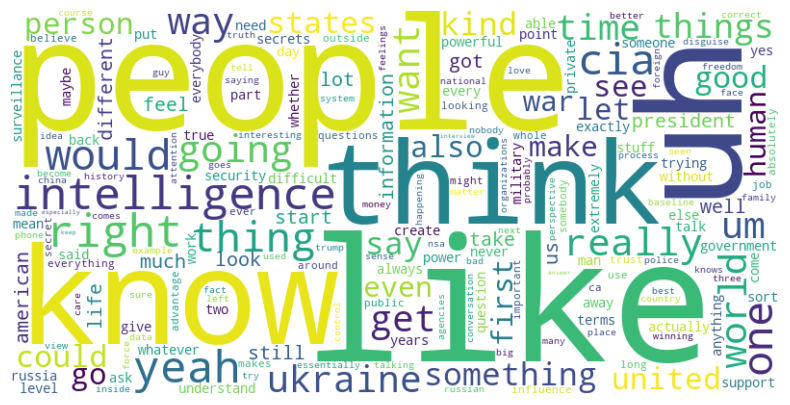

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_fd)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [23]:
!pip install praw

  Obtaining dependency information for praw from https://files.pythonhosted.org/packages/81/6a/21bc058bcccbe03f6a0895bf1bd60c805f0c526aa4e9bfaac775ed0b299c/praw-7.7.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ------------------------------ --------- 143.4/191.0 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 3.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
# Read the credentials from the file
with open('praw_creds.txt', 'r') as file:
    lines = file.readlines()

credentials = {}
for line in lines:
    key, value = line.strip().split('=')
    credentials[key] = value

# Now you can use the credentials in PRAW
reddit = praw.Reddit(
    client_id=credentials['client_id'], 
    client_secret=credentials['client_secret'], 
    user_agent=credentials['user_agent']
)


In [27]:
# Initialize the PRAW Reddit instance
reddit = praw.Reddit(
    client_id='FMoJ_SZGolbQbdkv6yogtw', 
    client_secret='Yg30a8zwXKLhYwJWozh7ak0EFQmjWg', 
    user_agent='Vid2Text'
)

# Extract comments from the Reddit post
url = "https://www.reddit.com/r/lexfridman/comments/wjej2a/andrew_bustamante_cia_spy_lex_fridman_podcast_310/"
submission = reddit.submission(url=url)
submission.comments.replace_more(limit=None)  # This line ensures you get all comments, not just the top ones

comments = []
for top_level_comment in submission.comments:
    comments.append(top_level_comment.body)


## Sentiment Analysis

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment of each comment
sentiment_scores = [analyzer.polarity_scores(comment)['compound'] for comment in comments]

# Convert sentiment scores to labels
sentiment_labels = ["Positive" if score > 0.05 else "Negative" if score < -0.05 else "Neutral" for score in sentiment_scores]
sentiment_df = pd.DataFrame(sentiment_labels, columns=['Sentiment'])

# Plot the sentiment distribution
sentiment_distribution = sentiment_df['Sentiment'].value_counts()
fig_sentiment = px.pie(sentiment_distribution, names=sentiment_distribution.index, values=sentiment_distribution.values,
                       title="Sentiment Distribution of Reddit Comments", hole=0.3)
fig_sentiment.show()


In [29]:
# Tokenize the comments and compute frequency distribution
all_tokens = [word_tokenize(comment.lower()) for comment in comments]
tokens = [token for sublist in all_tokens for token in sublist]

# Filter out common stopwords and non-alphabetic tokens
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
freq_dist = FreqDist(filtered_tokens)

# Get top 20 words
top_words = freq_dist.most_common(20)
df_words = pd.DataFrame(top_words, columns=["Word", "Frequency"])

# Plot the top keywords
fig_keywords = px.bar(df_words, x='Word', y='Frequency', title='Top 20 Keywords in Reddit Comments', 
                      labels={'Word': 'Keywords', 'Frequency': 'Count'})
fig_keywords.show()


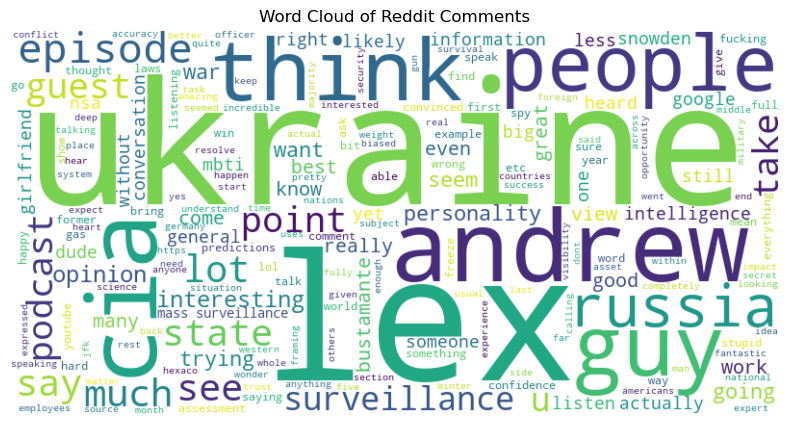

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud from the filtered tokens
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reddit Comments')
plt.show()


In [32]:
# Calculate comment lengths
comment_lengths = [len(comment.split()) for comment in comments]

# Plot the distribution
fig_length = px.histogram(comment_lengths, nbins=50, labels={'value': 'Comment Length (words)'})
fig_length.show()


In [33]:
# Get top 5 positive comments
top_positive_comments = [comments[i] for i, score in enumerate(sentiment_scores) if score > 0.8][:5]

# Get top 5 negative comments
top_negative_comments = [comments[i] for i, score in enumerate(sentiment_scores) if score < -0.8][:5]

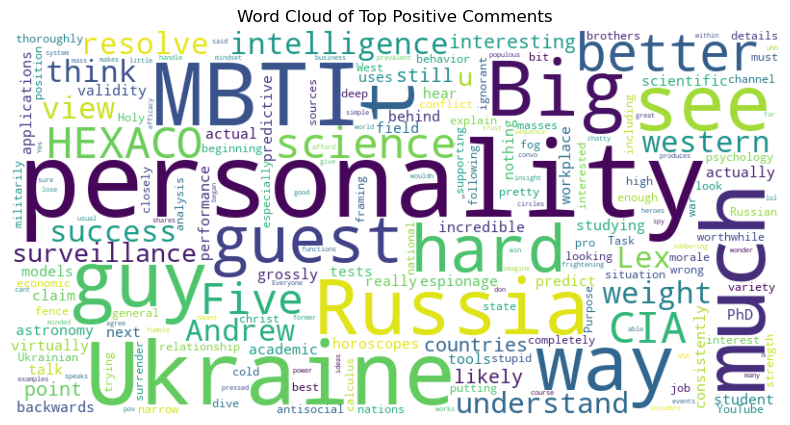

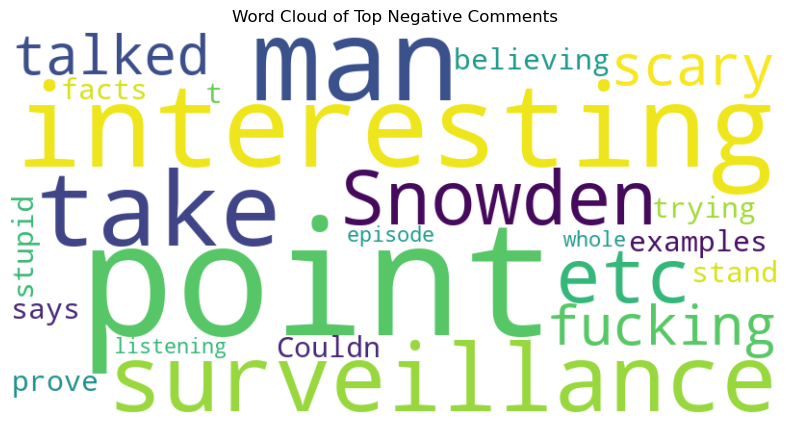

In [34]:
# Positive Comments Word Cloud
positive_text = ' '.join(top_positive_comments)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Positive Comments')
plt.show()

# Negative Comments Word Cloud
negative_text = ' '.join(top_negative_comments)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Negative Comments')
plt.show()


In [35]:
# Data for the bar chart
labels = ["Positive Comment {}".format(i+1) for i in range(5)] + ["Negative Comment {}".format(i+1) for i in range(5)]
scores = sentiment_scores[:5] + sentiment_scores[-5:]

df_top_comments = pd.DataFrame({'Comments': labels, 'Sentiment Score': scores})

# Plotting the bar chart
fig = px.bar(df_top_comments, x='Comments', y='Sentiment Score', title='Sentiment Scores of Top Positive and Negative Comments', 
             labels={'Comments': 'Comments', 'Sentiment Score': 'Score'}, color='Sentiment Score', color_continuous_scale='RdBu')
fig.show()


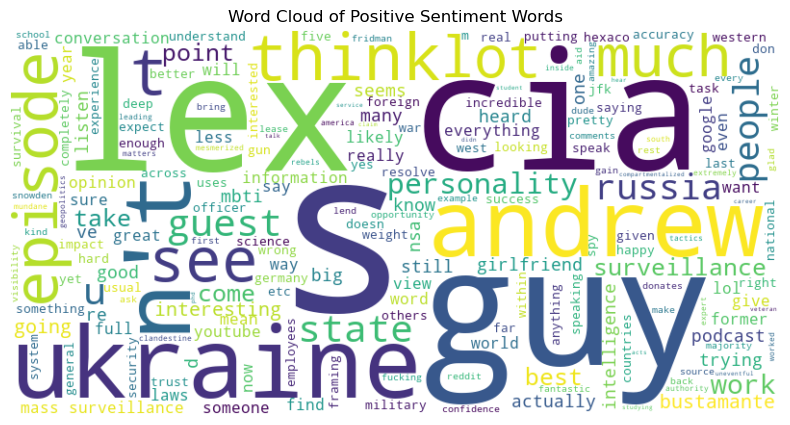

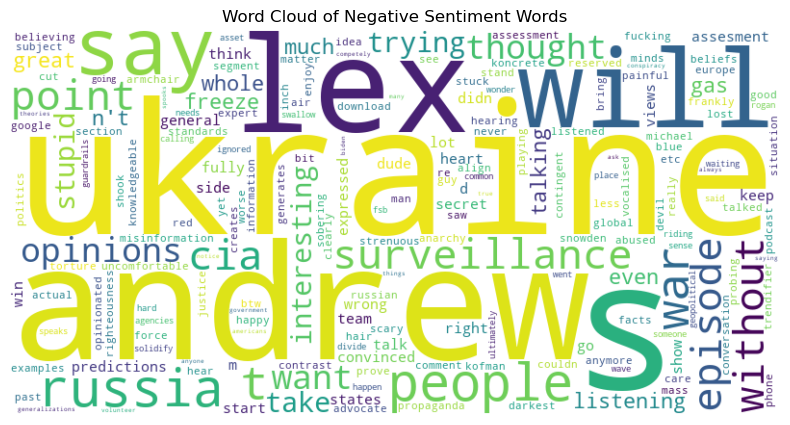

In [39]:
positive_words = [word for comment, label in zip(comments, sentiment_labels) for word in word_tokenize(comment.lower()) if label == "Positive"]
negative_words = [word for comment, label in zip(comments, sentiment_labels) for word in word_tokenize(comment.lower()) if label == "Negative"]
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))

# Plotting
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Words')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Words')
plt.show()


In [40]:
import pandas as pd
import plotly.express as px

# Generate the scatter plot again
df_comment_analysis = pd.DataFrame({
    'Length': [len(comment.split()) for comment in comments], 
    'Sentiment': sentiment_scores
})

fig1 = px.scatter(df_comment_analysis, x='Length', y='Sentiment', 
                  title='Comment Length vs Sentiment Score', 
                  color='Sentiment', color_continuous_scale='RdBu')
fig1.show()


In [41]:
# Code for Comment Word Count Distribution
comment_lengths = [len(comment.split()) for comment in comments]
fig2 = px.histogram(comment_lengths, nbins=50, title='Distribution of Comment Word Counts')
fig2.show()


In [42]:
from nltk.util import ngrams

bigrams = list(ngrams(filtered_tokens, 2))
bigram_freq = FreqDist(bigrams)
top_bigrams = bigram_freq.most_common(20)
df_bigrams = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])
df_bigrams['Bigram'] = df_bigrams['Bigram'].apply(lambda x: ' '.join(x))
fig3 = px.bar(df_bigrams, x='Bigram', y='Frequency', title='Top Bigrams in Reddit Comments')
fig3.show()
